In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import warnings
import itertools

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
pd.set_option('display.max_columns', None)

ckd_df = pd.read_excel(
    "Data/ckd_dataset.xlsx"
)

ckd_df

,ID,gender,age,SBP,BMI,etiology of CKD,Hb,Alb,Cr,eGFR,CKD_stage,CKD category,dip-stick proteinuria,proteinuria,urinary occult blood,UPCR,UPCR category,hypertension,prevalence of CVD,diabetes,use of RAASi,use of CCB,use of diuretics,eGFR(0M),50%eGFR,eGFR(6M),50%eGFR_reached(6M),eGFR(12M),50%eGFR_reached(12M),eGFR(18M),50%eGFR1_reached(18M),eGFR(24M),50%eGFR_reached(24M),eGFR(30M),50%eGFR_reached(30M),eGFR(36M),50%eGFR_reached(36M),eGFR(last visit),observational duration,50%eGFR_reached,50%eGFR_duration,RRT,RRT_duration,HD or PD,CKD progression,CKD progression_duration,death,death_duration,development of CVD,development of CVD_duration,≥6M followed
0,10101,2,74,120.0,23.137669,2,12.0,4.0,1.20,34.146986,3,6.0,2.0,1.0,0.0,1.253731,3.0,1,0,0,1,1,0,34.146986,17.073493,26.454698,0.0,24.331582,0.0,24.682189,0.0,21.614854,0.0,20.420524,0.0,18.495328,0.0,18.495328,37,0,37,0,37,NaN,0,37,0,37,0,37,1
1,10102,1,39,121.0,31.708284,3,15.0,4.7,1.31,50.451187,3,5.0,0.0,0.0,0.0,0.325926,2.0,1,0,0,0,0,0,50.451187,25.225594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.451187,1,0,1,0,1,NaN,0,1,0,1,0,1,0
2,10103,1,74,143.0,24.554564,2,10.9,3.8,4.95,9.804696,5,12.0,3.0,1.0,0.0,1.759615,3.0,1,0,1,1,1,1,9.804696,4.902348,7.677550,0.0,5.578057,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.578057,13,0,13,1,13,2.0,1,13,0,13,0,13,1
3,10201,1,57,139.0,28.515625,2,15.9,4.8,0.84,73.570568,2,4.0,1.0,1.0,0.0,0.513514,3.0,1,0,0,0,0,0,73.570568,36.785284,78.287758,0.0,71.343858,0.0,72.845992,0.0,71.908942,0.0,71.562914,0.0,67.225032,0.0,67.225032,37,0,37,0,37,NaN,0,37,0,37,0,37,1
4,10202,1,32,154.0,24.582701,4,14.4,4.4,0.87,83.558305,2,1.0,-1.0,0.0,0.0,0.025000,1.0,1,0,0,0,0,0,83.558305,41.779153,75.027238,0.0,69.595257,0.0,68.856399,0.0,72.901926,0.0,69.749275,0.0,69.171408,0.0,69.171408,36,0,36,0,36,NaN,0,36,0,36,0,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,160109,2,71,179.0,20.487647,2,9.9,4.2,1.90,20.901554,4,9.0,1.0,1.0,1.0,0.651558,3.0,1,0,0,0,0,0,20.901554,10.450777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.901554,1,0,1,0,1,NaN,0,1,0,1,0,1,0
1134,160110,2,62,139.0,19.992311,1,11.8,4.0,4.74,7.993339,5,12.0,2.0,1.0,1.0,2.784223,3.0,1,1,1,1,1,0,7.993339,3.996670,7.378159,0.0,7.041702,0.0,6.694902,0.0,6.109193,0.0,5.459988,0.0,4.664378,0.0,4.664378,36,0,36,0,36,NaN,0,36,0,36,0,36,1
1135,160111,1,60,118.0,27.584219,2,14.6,4.2,1.42,40.819612,3,4.0,-1.0,0.0,0.0,0.020450,1.0,1,0,0,1,1,0,40.819612,20.409806,46.302740,0.0,45.511836,0.0,45.511836,0.0,45.299938,0.0,47.953885,0.0,41.861876,0.0,41.861876,38,0,38,0,38,NaN,0,38,0,38,0,38,1
1136,160112,1,52,94.0,21.295295,4,13.5,4.3,2.13,27.293642,4,8.0,-1.0,0.0,0.0,0.260047,2.0,1,0,0,1,0,0,27.293642,13.646821,31.288164,0.0,30.231081,0.0,27.713700,0.0,28.004897,0.0,26.455610,0.0,28.931595,0.0,28.931595,36,0,36,0,36,NaN,0,36,0,36,0,36,1


In [21]:
#summary statistics of those that would benefit from mean, std, etc
ckd_df.loc[:, ["age", "SBP", "BMI", "Hb", "Alb", "Cr", "eGFR", "UPCR"]].describe()

,age,SBP,BMI,Hb,Alb,Cr,eGFR,UPCR
count,1138.000000,1120.00000,1001.000000,1136.000000,1126.000000,1138.000000,1138.000000,1050.000000
mean,67.578207,139.79375,23.735593,11.938644,3.843099,2.269411,32.712612,2.161066
std,13.672753,22.45435,4.031391,2.292645,0.636202,1.717471,18.716644,3.231074
min,21.000000,66.00000,14.239943,5.900000,1.400000,0.510000,2.472772,0.000000
25%,61.000000,125.00000,21.030284,10.200000,3.500000,1.200000,17.495989,0.131126
50%,70.000000,138.00000,23.250047,12.000000,4.000000,1.740000,29.772321,0.742262
75%,77.000000,152.00000,25.762981,13.600000,4.300000,2.680000,44.968603,2.849813
max,94.000000,234.00000,44.158639,19.000000,5.200000,13.320000,89.981926,20.182927


In [3]:
#counting values of those who wouldn't have a super good histogram distribution - experimented with MultiIndex
counted_values = [];
binary_columns = ["proteinuria", "urinary occult blood", "hypertension", "prevalence of CVD", "diabetes", "use of RAASi", "use of CCB", "use of diuretics", "50%eGFR_reached", "death", "CKD progression", "development of CVD"]
other_binary_columns = ["gender", "HD or PD"] #separate array was just made to fit the dataset - they have values of 1 and 2 rather than 0 and 1

counted_iterables = [binary_columns, [0, 1]]
other_counted_iterables = [other_binary_columns, [1, 2]]

index = pd.MultiIndex.from_product(counted_iterables, names=["column", "value"])
index2 = pd.MultiIndex.from_product(other_counted_iterables, names=["column", "value"])
index = index.append(index2)

for column in itertools.chain(binary_columns, other_binary_columns):
    combined_value = ckd_df[column].value_counts().array
    split_values = np.array_split(combined_value, 2)
    counted_values.append(split_values[0])
    counted_values.append(split_values[1])
    

indexed_binary_df_count = pd.DataFrame(counted_values, index)
indexed_binary_df_count = indexed_binary_df_count.rename(columns={0: "count"})
indexed_binary_df_count


count
column               value       
proteinuria          0        710
                     1        412
urinary occult blood 0        744
                     1        378
hypertension         0       1027
                     1        111
prevalence of CVD    0        833
                     1        305
diabetes             0        716
                     1        422
use of RAASi         0        720
                     1        418
use of CCB           0        602
                     1        536
use of diuretics     0        757
                     1        381
50%eGFR_reached      0        987
                     1        151
death                0       1060
                     1         78
CKD progression      0        858
                     1        280
development of CVD   0       1020
                     1        118
gender               1        792
                     2        346
HD or PD             1        194
                     2         15

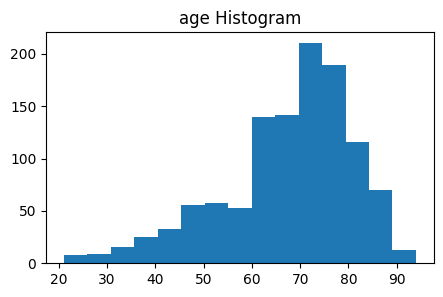

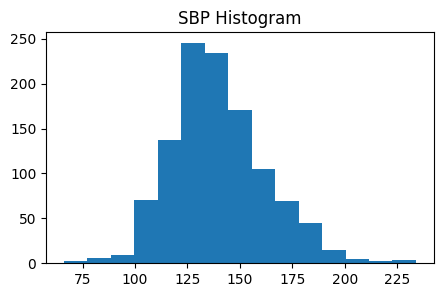

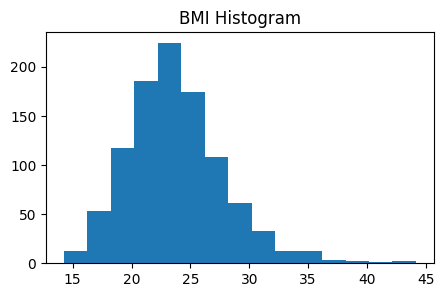

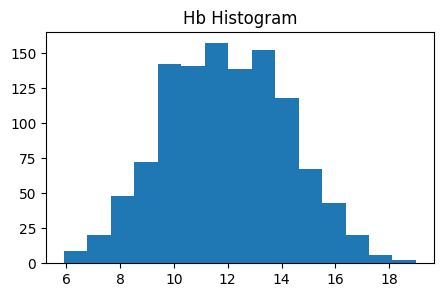

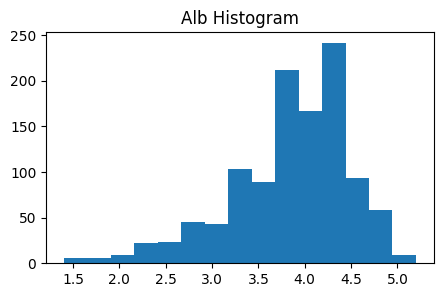

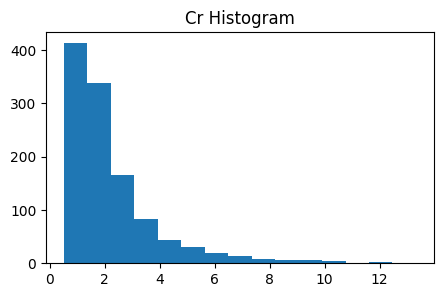

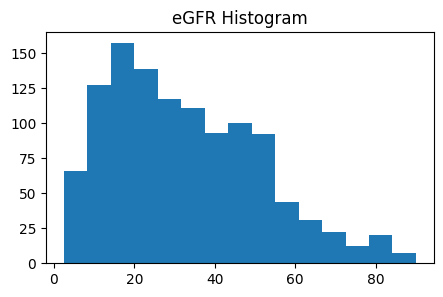

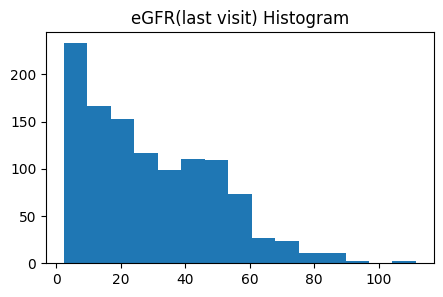

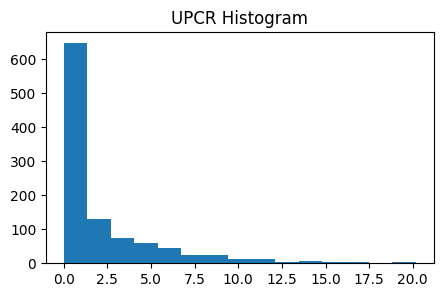

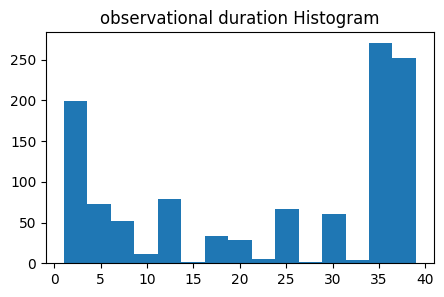

In [20]:
#hisograms that would most likely have 15 bins - outliers makes the data kinda ugly though
histogram_cols = ["age", "SBP", "BMI", "Hb", "Alb", "Cr", "eGFR", "eGFR(last visit)", "UPCR", "observational duration"]

for col in histogram_cols:
    hist, ax = plt.subplots(figsize=(5,3))
    n, bins, patches = ax.hist(ckd_df.loc[:, col], bins=15)
    ax.set_title(col + " Histogram")



Text(0.5, 1.0, 'Dip-stick test')

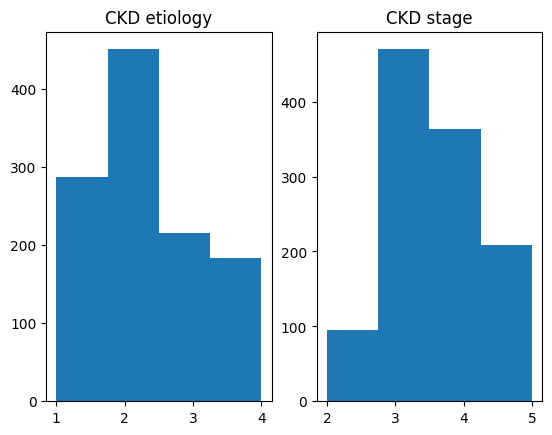

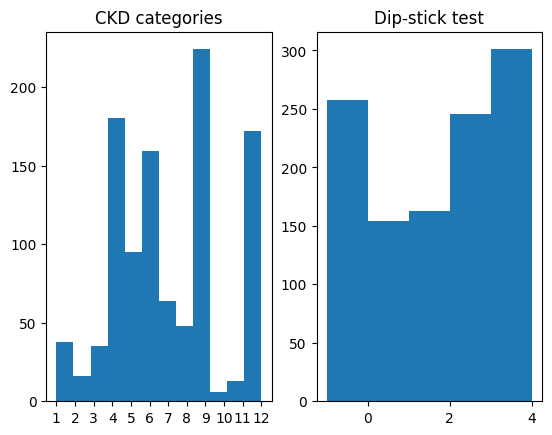

In [5]:
#histogram with other bin sizes
other_histogram_cols = ["etiology of CKD", "CKD_stage", "CKD category", "dip-stick proteinuria"]

hist_odd, (ax_etiology, ax_stage) = plt.subplots(1, 2)
n, bins, patches = ax_etiology.hist(ckd_df.loc[:, other_histogram_cols[0]], bins=4)
n, bins, patches = ax_stage.hist(ckd_df.loc[:, other_histogram_cols[1]], bins=4)
ax_etiology.set_title("CKD etiology")
ax_stage.set_title("CKD stage")

hist_odd2, (ax_cat, ax_dipstick) = plt.subplots(1, 2)
n, bins, patches = ax_cat.hist(ckd_df.loc[:, other_histogram_cols[2]], bins=12)
n, bins, patches = ax_dipstick.hist(ckd_df.loc[:, other_histogram_cols[3]], bins=5)
ax_cat.set_xticks(range(1,13))
ax_cat.set_title("CKD categories")
ax_dipstick.set_title("Dip-stick test")

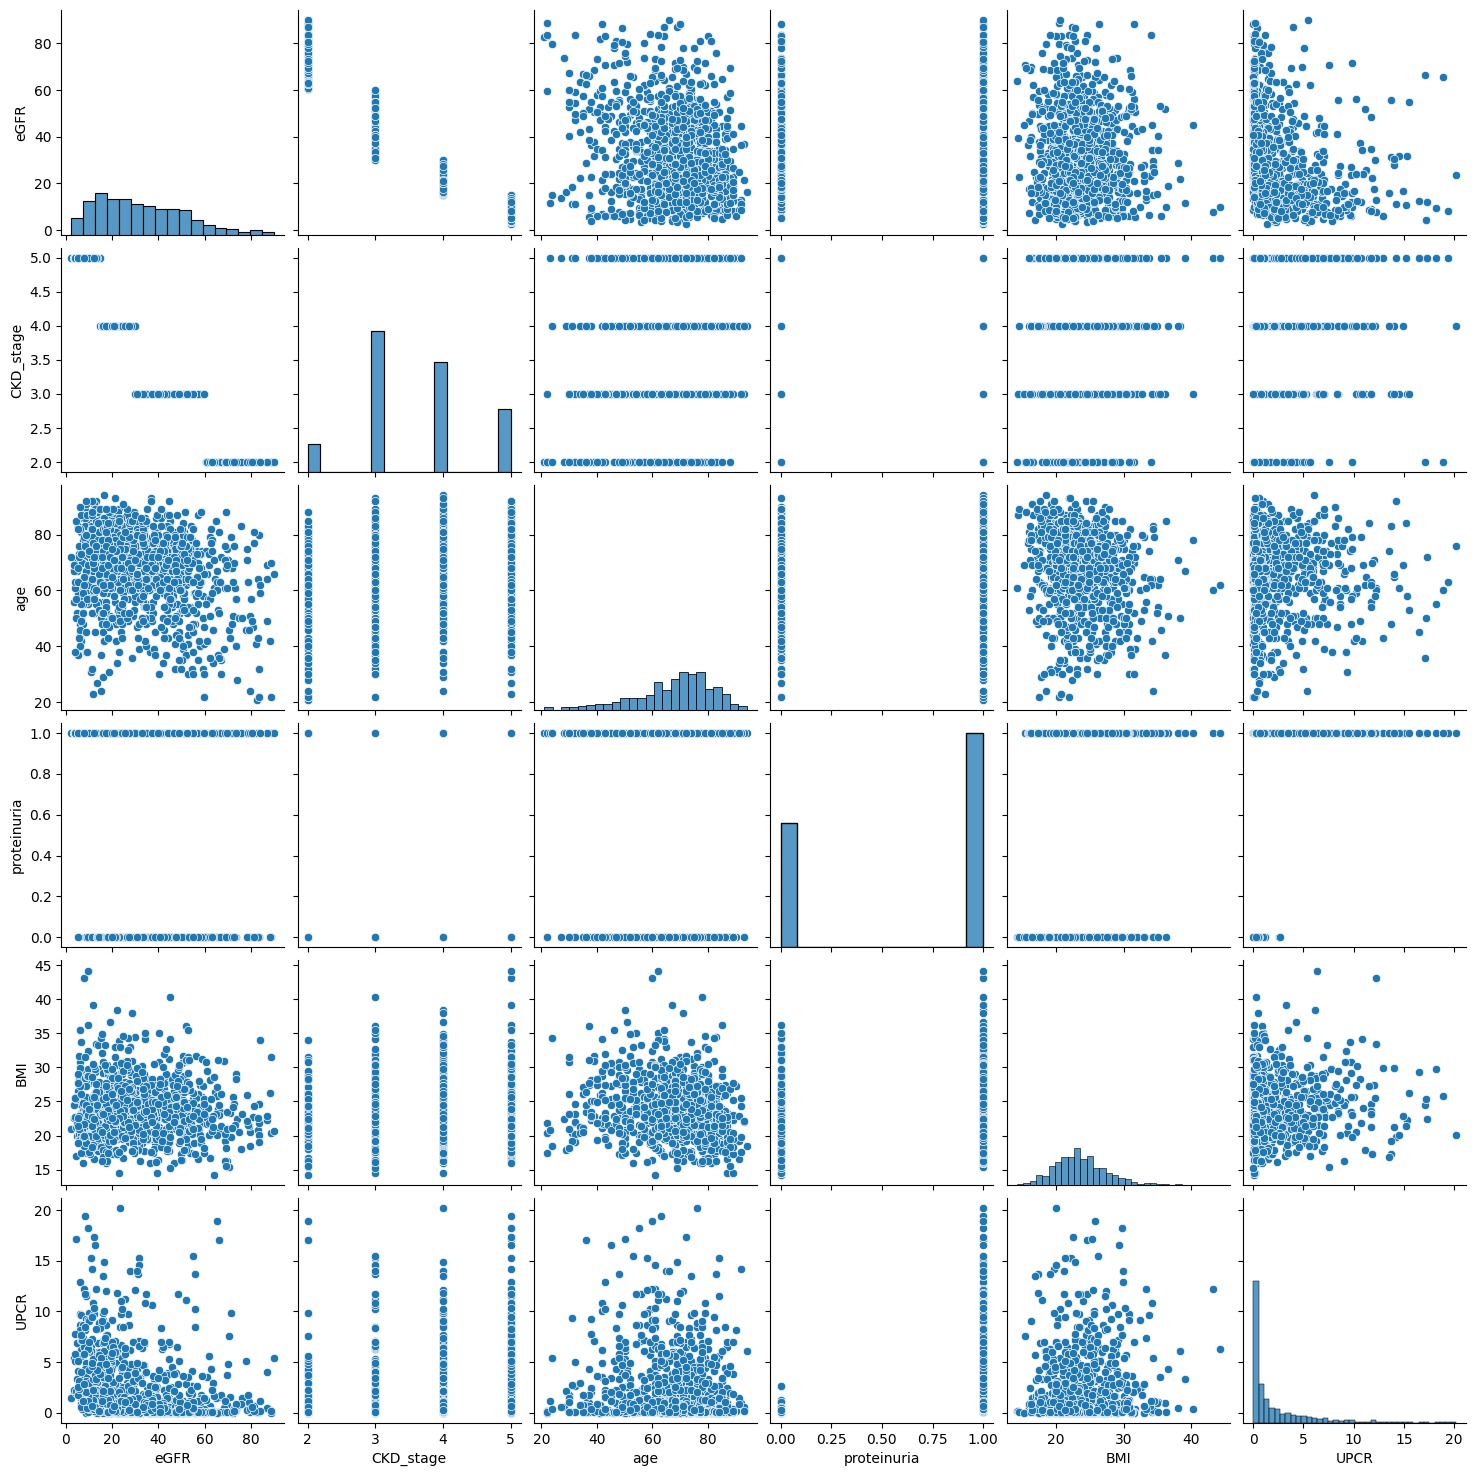

In [19]:
# pair plot ideas - eGFR vs eGFR (last visit), proteinuria vs eGFR last visit, 
# stage of CKD vs CVD prevalence, medications (any) vs stage, hypertension vs proteinuria

sns.pairplot(ckd_df, vars=["eGFR", "CKD_stage", "age", "proteinuria", "BMI", "UPCR"])